In [1]:
from tinybig.expansion import taylor_expansion
import torch

x = torch.Tensor([[1, 2, 3]])
exp_func = taylor_expansion(name='taylor_expansion_for_toy_example', d=2)
print('m:', x.size(1), 'D:', exp_func.calculate_D(m=x.size(1)))

kappa_x = exp_func(x)
print(x, kappa_x)
print(x.shape, kappa_x.shape)

m: 3 D: 12
tensor([[1., 2., 3.]]) tensor([[1., 2., 3., 1., 2., 3., 2., 4., 6., 3., 6., 9.]])
torch.Size([1, 3]) torch.Size([1, 12])


In [2]:
data_transformation_configs = {
    'data_transformation_class': 'tinybig.expansion.taylor_expansion',
    'data_transformation_parameters':{
        'name': 'taylor_expansion_from_configs',
        'd': 2
    }
}

from tinybig.util import get_obj_from_str
exp_func = get_obj_from_str(data_transformation_configs['data_transformation_class'])(**data_transformation_configs['data_transformation_parameters'])
kappa_x = exp_func(x)
print(x, kappa_x)

tensor([[1., 2., 3.]]) tensor([[1., 2., 3., 1., 2., 3., 2., 4., 6., 3., 6., 9.]])


In [3]:
from tinybig.expansion import taylor_expansion
import torch

x = torch.Tensor([[1, 2, 3]])
preprocess_func = torch.nn.LayerNorm(normalized_shape=3)
exp_func = taylor_expansion(
    name='taylor_expansion_with_preprocessing', 
    d=2, 
    preprocess_functions=preprocess_func
)

kappa_x = exp_func(x)
print(x, kappa_x)

tensor([[1., 2., 3.]]) tensor([[-1.2247,  0.0000,  1.2247,  1.5000, -0.0000, -1.5000, -0.0000,  0.0000,
          0.0000, -1.5000,  0.0000,  1.5000]], grad_fn=<CatBackward0>)


In [4]:
from tinybig.expansion import taylor_expansion
import torch

sigmoid = torch.nn.Sigmoid()
layer_norm = torch.nn.LayerNorm(normalized_shape=3)
exp_func = taylor_expansion(
    name='taylor_expansion_with_sigmoid_layernorm', 
    d=2, 
    preprocess_functions=[sigmoid, layer_norm]
)

x = torch.Tensor([[1, 2, 3]])
kappa_x = exp_func(x)
print(x, kappa_x)

tensor([[1., 2., 3.]]) tensor([[-1.3402,  0.2814,  1.0588,  1.7962, -0.3772, -1.4190, -0.3772,  0.0792,
          0.2980, -1.4190,  0.2980,  1.1210]], grad_fn=<CatBackward0>)


In [5]:
from tinybig.config import config
from tinybig.util import get_obj_from_str

config_obj = config(name='taylor_expansion_config')
func_configs = config_obj.load_yaml(cache_dir='./configs', config_file='expansion_function_postprocessing.yaml')
print(func_configs)

data_transformation_configs = func_configs['data_transformation_configs']
exp_func = get_obj_from_str(data_transformation_configs['data_transformation_class'])(**data_transformation_configs['data_transformation_parameters'])

x = torch.Tensor([[1, 2, 3]])
kappa_x = exp_func(x)
print(x, kappa_x)

{'data_transformation_configs': {'data_transformation_class': 'tinybig.expansion.taylor_expansion', 'data_transformation_parameters': {'name': 'taylor_expansion_with_preprocessing', 'd': 2, 'postprocess_function_configs': [{'function_class': 'torch.nn.Sigmoid'}, {'function_class': 'torch.nn.LayerNorm', 'function_parameters': {'normalized_shape': 12}}]}}}
tensor([[1., 2., 3.]]) tensor([[-1.9707, -0.3362,  0.4473, -1.9707, -0.3362,  0.4473, -0.3362,  0.7686,
          0.9380,  0.4473,  0.9380,  0.9636]],
       grad_fn=<NativeLayerNormBackward0>)


In [6]:
import matplotlib.pyplot as plt
def show_image(X):
    plt.figure(figsize=(8, 8))
    plt.imshow(X.numpy().squeeze(), cmap='gray')
    plt.show()

torch.Size([1, 784]) tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
       

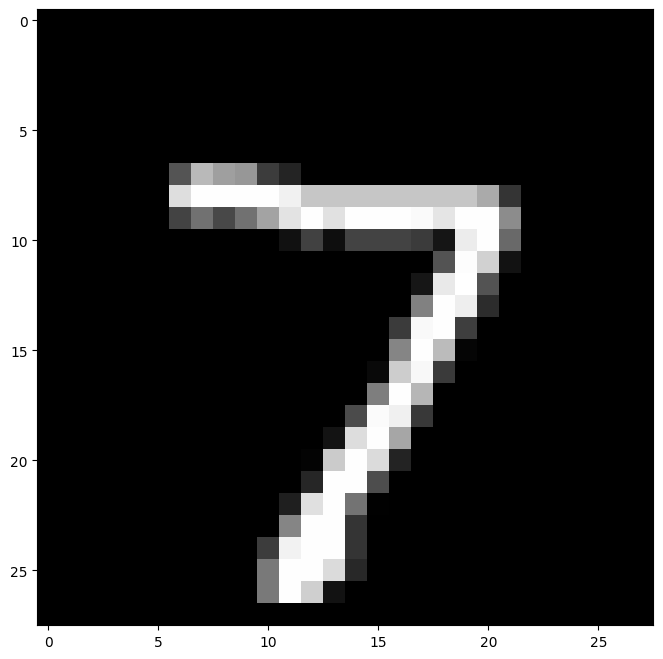

In [7]:
from tinybig.data import mnist
mnist_data = mnist(name='mnist', train_batch_size=64, test_batch_size=64)
mnist_loaders = mnist_data.load(cache_dir='./data/')
X_batch, y_batch = next(iter(mnist_loaders['test_loader']))
x = X_batch[0:1,:]
print(x.shape, x)
show_image(x.view(28, 28))

In [8]:
from tinybig.expansion import taylor_expansion

exp_func = taylor_expansion(name='taylor_expansion_for_mnist', d=2)
kappa_x = exp_func(x)
raw_image, expansion_image = kappa_x[0,:784], kappa_x[0,784:]
print(raw_image.shape, expansion_image.shape)

torch.Size([784]) torch.Size([614656])


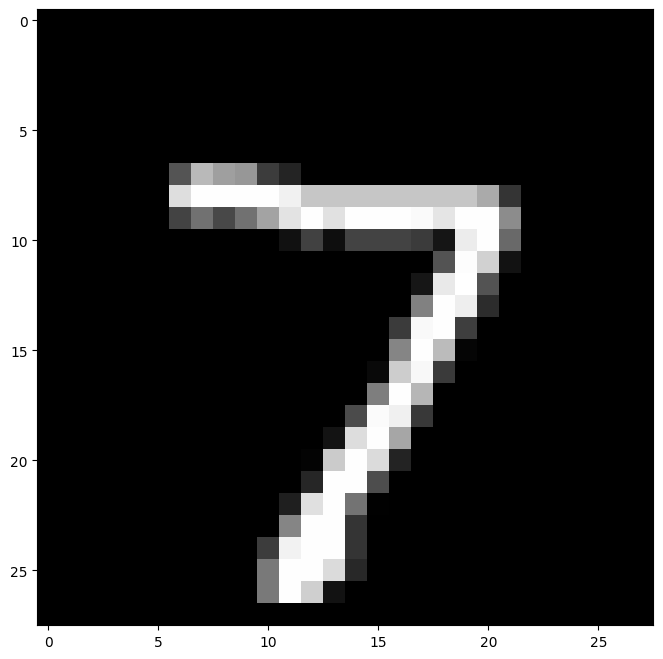

In [9]:
show_image(raw_image.view(28, 28))

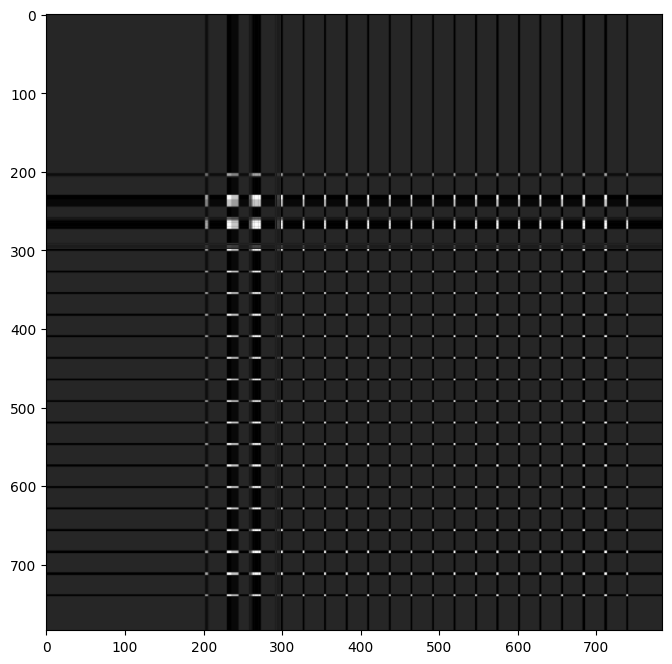

In [10]:
show_image(expansion_image.view(784, 784))

In [11]:
def reshape_expansions(expansion):
    grid28x28 = expansion.reshape(28, 28, 28, 28)
    reshaped_expansion = grid28x28.permute(0, 2, 1, 3).reshape(784, 784)
    return reshaped_expansion

torch.Size([784, 784])


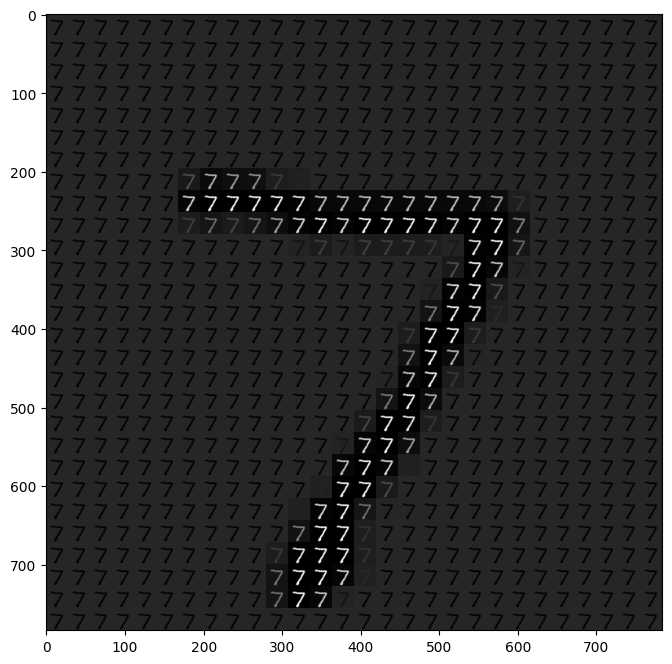

In [12]:
reshaped_expansion_image = reshape_expansions(expansion_image)
print(reshaped_expansion_image.shape)
show_image(reshaped_expansion_image)